In [95]:
library(edgeR)
library(ggplot2)
library(tidyr)

## Load data

In [96]:
list.files("../../results/DiffExpr/pseudobulks/")

[1] "annotation_chimp.csv"              "annotation_human.csv"             
[3] "annotation_macaque.csv"            "annotation_spatial_libd_human.csv"
[5] "expression_chimp.csv"              "expression_human.csv"             
[7] "expression_macaque.csv"            "expression_spatial_libd_human.csv"

### Expression table

In [97]:
expression_human <- read.csv('../../results/DiffExpr/pseudobulks/expression_human.csv')
head(expression_human)

,X,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,⋯,L2.human_j4,L1.human_j4,L6.human_j4,WM.human_j6,L2.human_j6,L3.human_j6,L5.human_j6,L6.human_j6,L1.human_j6,L4.human_j6
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,OR4F5,0.000000000,0.00000000,0.000000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,⋯,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.000000000,0.00000000
2,OR4F29,0.000000000,0.00000000,0.000000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,⋯,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.000000000,0.00000000
3,OR4F16,0.000000000,0.00000000,0.000000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,⋯,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.000000000,0.00000000
4,SAMD11,0.003875969,0.01072386,0.002463054,0.003883495,0.01200000,0.00733945,0.00000000,0.006143345,0.006157635,⋯,0.004273504,0.02100840,0.00000000,0.00000000,0.00000000,0.00295858,0.0122807,0.0000000,0.000000000,0.01226994
5,NOC2L,0.096899256,0.20107254,0.184729190,0.210679140,0.07399999,0.17247716,0.20588236,0.078498214,0.509851160,⋯,0.666667460,0.20168068,0.23361811,0.08423912,0.39449550,0.48224780,0.6333329,0.3689563,0.134328370,0.62883490
6,KLHL17,0.019379845,0.08310992,0.029556649,0.059223310,0.02800000,0.05504586,0.07918552,0.027303765,0.220443110,⋯,0.098290600,0.02521008,0.05698005,0.01766304,0.09174311,0.14497045,0.1421053,0.1094148,0.007462686,0.12883438


In [98]:
expression_human_libd <- read.csv('../../results/DiffExpr/pseudobulks/expression_spatial_libd_human.csv')
head(expression_human_libd)

,X,L1.151507,L3.151507,WM.151507,L6.151507,L5.151507,L2.151507,L4.151507,L3.151508,L1.151508,⋯,L2.151675,L4.151675,L6.151675,L3.151676,L1.151676,WM.151676,L6.151676,L5.151676,L2.151676,L4.151676
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MIR1302-2HG,0.000000000,0.0008583691,0,0,0.000000000,0,0.000000000,0.0000000000,0.000000000,⋯,0.004201681,0.00000000,0.000000000,0.00000000,0.000000000,0,0,0.000000000,0.000000000,0
2,FAM138A,0.000000000,0.0000000000,0,0,0.000000000,0,0.000000000,0.0000000000,0.000000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0,0,0.000000000,0.000000000,0
3,OR4F5,0.000000000,0.0000000000,0,0,0.000000000,0,0.000000000,0.0000000000,0.000000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0,0,0.000000000,0.000000000,0
4,AL627309.1,0.003030303,0.0008583691,0,0,0.001517451,0,0.005586592,0.0007911393,0.001424501,⋯,0.000000000,0.00456621,0.001930502,0.00304414,0.005102041,0,0,0.003215434,0.004219409,0
5,AL627309.3,0.000000000,0.0000000000,0,0,0.000000000,0,0.000000000,0.0000000000,0.000000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0,0,0.000000000,0.000000000,0
6,AL627309.2,0.000000000,0.0000000000,0,0,0.000000000,0,0.000000000,0.0000000000,0.000000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0,0,0.000000000,0.000000000,0


Merge two tables

In [99]:
expression = merge(expression_human, expression_human_libd, by='X')
head(expression)

,X,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,⋯,L2.151675,L4.151675,L6.151675,L3.151676,L1.151676,WM.151676,L6.151676,L5.151676,L2.151676,L4.151676
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,0.186046590,0.284182550,0.450738550,0.501940370,0.1439999,0.313762000,0.468325800,0.0614333970,0.592364430,⋯,0.193277310,0.12328765,0.104247145,0.17656004,0.071428570,0.211945890,0.098169714,0.125401870,0.21940938,0.162280650
2,A1CF,0.000000000,0.000000000,0.002463054,0.012621361,0.0020000,0.000000000,0.000000000,0.0000000000,0.006157635,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000
3,A2M,0.414728820,0.554959800,0.426108240,0.547572260,0.5640004,0.455046770,0.579186200,0.1542660000,0.443349000,⋯,0.584033900,0.46118748,0.332046720,0.61034870,0.499999820,0.404623900,0.347753730,0.516076900,0.45147700,0.495614300
4,A2ML1,0.003875969,0.002680965,0.009852217,0.002912621,0.0100000,0.001834862,0.015837105,0.0006825938,0.001231527,⋯,0.004201681,0.00456621,0.000000000,0.00304414,0.000000000,0.007707129,0.000000000,0.004823151,0.00000000,0.000000000
5,A3GALT2,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000,0.000000000,0.000000000,0.0000000000,0.000000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000
6,A4GALT,0.000000000,0.000000000,0.009852217,0.010679613,0.0040000,0.001834862,0.004524887,0.0027303754,0.003694581,⋯,0.021008404,0.00913242,0.001930502,0.01369863,0.005102041,0.005780347,0.008319467,0.011254019,0.02531645,0.004385965


In [100]:
nrow(expression)

[1] 19404

### Annotation table

In [101]:
annotation_human <- read.csv('../../results/DiffExpr/pseudobulks/annotation_human.csv', row.names=1)
head(annotation_human)

,layer,sample_id,condition
,<chr>,<chr>,<chr>
WM.human_759,WM,human_759,human
L5.human_759,L5,human_759,human
L2.human_759,L2,human_759,human
L3.human_759,L3,human_759,human
L1.human_759,L1,human_759,human
L6.human_759,L6,human_759,human


In [102]:
annotation_human_libd <- read.csv('../../results/DiffExpr/pseudobulks/annotation_spatial_libd_human.csv', row.names=1)
head(annotation_human_libd)

,layer,sample_id,condition
,<chr>,<int>,<chr>
L1.151507,L1,151507,spatial_libd_human
L3.151507,L3,151507,spatial_libd_human
WM.151507,WM,151507,spatial_libd_human
L6.151507,L6,151507,spatial_libd_human
L5.151507,L5,151507,spatial_libd_human
L2.151507,L2,151507,spatial_libd_human


In [103]:
annotation = rbind(annotation_human, annotation_human_libd)
head(annotation, 3)
tail(annotation, 3)

,layer,sample_id,condition
,<chr>,<chr>,<chr>
WM.human_759,WM,human_759,human
L5.human_759,L5,human_759,human
L2.human_759,L2,human_759,human


,layer,sample_id,condition
,<chr>,<chr>,<chr>
L5.151676,L5,151676,spatial_libd_human
L2.151676,L2,151676,spatial_libd_human
L4.151676,L4,151676,spatial_libd_human


## L1

### Subset L1

In [104]:
layer <- "L1"
ann_L1 <- annotation[annotation$layer == layer, ]
ann_L1$condition <- factor(ann_L1$condition, levels=c("human", "spatial_libd_human"))
ann_L1$condition <- relevel(ann_L1$condition, ref="spatial_libd_human")
head(ann_L1)

,layer,sample_id,condition
,<chr>,<chr>,<fct>
L1.human_759,L1,human_759,human
L1.human_j12,L1,human_j12,human
L1.human_j3,L1,human_j3,human
L1.human_j4,L1,human_j4,human
L1.human_j6,L1,human_j6,human
L1.151507,L1,151507,spatial_libd_human


In [105]:
expr_L1 <- expression[, rownames(ann_L1)]
rownames(expr_L1) <- expression$X
group <- ann_L1$condition
head(expr_L1)

,L1.human_759,L1.human_j12,L1.human_j3,L1.human_j4,L1.human_j6,L1.151507,L1.151508,L1.151509,L1.151510,L1.151673,L1.151674,L1.151675,L1.151676
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0.1439999,0.145015140,0.1909091,0.252100860,0.06716418,0.087878750,0.049857557,0.064204040,0.067736180,0.058823530,0.132596640,0.03603604,0.071428570
A1CF,0.0020000,0.000000000,0.0000000,0.008403362,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000
A2M,0.5640004,0.217522760,0.4181818,0.243697480,0.58955200,0.272727070,0.284900430,0.260334160,0.254902400,0.352941200,0.569061460,0.27027020,0.499999820
A2ML1,0.0100000,0.000000000,0.0000000,0.000000000,0.00000000,0.004545454,0.012820514,0.007036060,0.002673797,0.004524887,0.005524862,0.00000000,0.000000000
A3GALT2,0.0000000,0.000000000,0.0000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000
A4GALT,0.0040000,0.009063444,0.0000000,0.000000000,0.01492537,0.006060606,0.009971511,0.009674582,0.004456328,0.004524887,0.019337017,0.01351351,0.005102041


In [106]:
de_exp_table <- DGEList(counts=expr_L1, group=group)
de_exp_table

,L1.human_759,L1.human_j12,L1.human_j3,L1.human_j4,L1.human_j6,L1.151507,L1.151508,L1.151509,L1.151510,L1.151673,L1.151674,L1.151675,L1.151676
A1BG,0.14399993,0.145015140,0.190909130,0.252100860,0.067164180,0.087878750,0.049857557,0.0642040400,0.067736180,0.058823530,0.132596640,0.036036040,0.071428570
A1CF,0.00200000,0.000000000,0.000000000,0.008403362,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
A2M,0.56400037,0.217522760,0.418181840,0.243697480,0.589552000,0.272727070,0.284900430,0.2603341600,0.254902400,0.352941200,0.569061460,0.270270200,0.499999820
A2ML1,0.01000000,0.000000000,0.000000000,0.000000000,0.000000000,0.004545454,0.012820514,0.0070360596,0.002673797,0.004524887,0.005524862,0.000000000,0.000000000
A3GALT2,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
A4GALT,0.00400000,0.009063444,0.000000000,0.000000000,0.014925373,0.006060606,0.009971511,0.0096745820,0.004456328,0.004524887,0.019337017,0.013513514,0.005102041
A4GNT,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
AAAS,0.05600000,0.048338360,0.036363635,0.063025214,0.074626870,0.022727275,0.019943020,0.0193491630,0.017825313,0.031674210,0.044198890,0.022522524,0.045918368
AACS,0.10799993,0.063444100,0.154545460,0.159663870,0.074626870,0.062121186,0.044159546,0.0518909400,0.046345810,0.095022626,0.140883970,0.081081080,0.132653040
AADAC,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000


### Filter

In [122]:
keep <- filterByExpr(de_exp_table, group=group, min.count=0, min.total.count=2)
sum(keep)
de_exp_table <- de_exp_table[keep, , keep.lib.sizes=FALSE]

[1] 2767

### Normalizin

In [123]:
de_exp_table <- calcNormFactors(de_exp_table)

In [124]:
de_exp_table$samples

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
L1.human_759,human,2188.7157,0.9593800
L1.human_j12,human,2723.7697,0.9766792
L1.human_j3,human,3675.2356,0.9469824
L1.human_j4,human,3374.5521,1.0396504
L1.human_j6,human,1851.1790,1.0409276
L1.151507,spatial_libd_human,1142.4636,0.9224253
L1.151508,spatial_libd_human,937.3531,0.9294507
L1.151509,spatial_libd_human,1097.2618,0.9751888
L1.151510,spatial_libd_human,1039.6237,0.9766342


### Plot mds

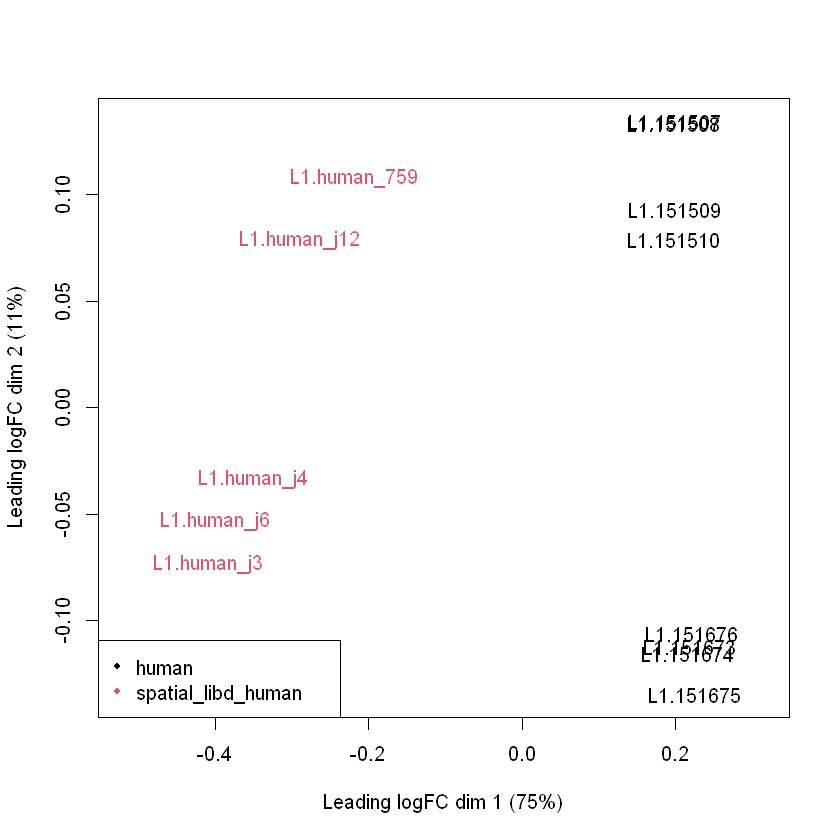

In [125]:
plotMDS(de_exp_table, col=as.numeric(de_exp_table$samples$group))
legend("bottomleft", as.character(unique(de_exp_table$samples$group)), col=1:3, pch=20)

### Estimating the Dispersion

In [126]:
de_exp_table <- estimateDisp(de_exp_table, robust=TRUE)

Using classic mode.



In [127]:
de_exp_table

,L1.human_759,L1.human_j12,L1.human_j3,L1.human_j4,L1.human_j6,L1.151507,L1.151508,L1.151509,L1.151510,L1.151673,L1.151674,L1.151675,L1.151676
A2M,0.5640004,0.21752276,0.41818184,0.24369748,0.5895520,0.27272707,0.28490043,0.26033416,0.25490240,0.35294120,0.5690615,0.27027020,0.4999998
AAK1,0.1800000,0.27190349,0.26363640,0.23529412,0.1343284,0.08484844,0.06695157,0.10202272,0.08556154,0.17647060,0.3259671,0.18468465,0.2857142
AAMP,0.1600000,0.18126896,0.40000000,0.28151262,0.1641791,0.11060600,0.10113954,0.11961279,0.11408211,0.14932127,0.2265195,0.14414410,0.1632653
AASDHPPT,0.3780003,0.55891246,0.55454546,0.65966440,0.3955222,0.09545451,0.06410258,0.09938421,0.13190745,0.19909503,0.3038676,0.16216213,0.2448979
ABAT,0.4760005,0.50453204,0.45454540,0.43697480,0.2835820,0.20909075,0.14957264,0.19700967,0.19518750,0.28959277,0.4834259,0.31531522,0.3367346
ABCA2,0.1119999,0.12688825,0.20909096,0.26890758,0.1567164,0.14848477,0.12535605,0.11521527,0.10516944,0.22171946,0.3839783,0.26576570,0.2755101
ABCA3,0.2620001,0.28096694,0.40909090,0.45798320,0.1940298,0.10909085,0.06837608,0.08970965,0.10695197,0.18552037,0.3314919,0.22972965,0.1938775
ABHD12,0.1759999,0.15105747,0.17272729,0.39075630,0.1417910,0.13181810,0.11965806,0.15127510,0.13458127,0.20361991,0.4060779,0.17117113,0.3265305
ABHD14A,0.1880000,0.23867084,0.21818185,0.35714287,0.1940298,0.17727260,0.13675208,0.16886534,0.15240662,0.12669684,0.2734808,0.16216213,0.2499999
ABHD17A,0.2840002,0.41993982,0.56363624,0.71428645,0.2761193,0.31666642,0.27065542,0.34476632,0.34135538,0.42986426,0.5856360,0.35585570,0.5306121


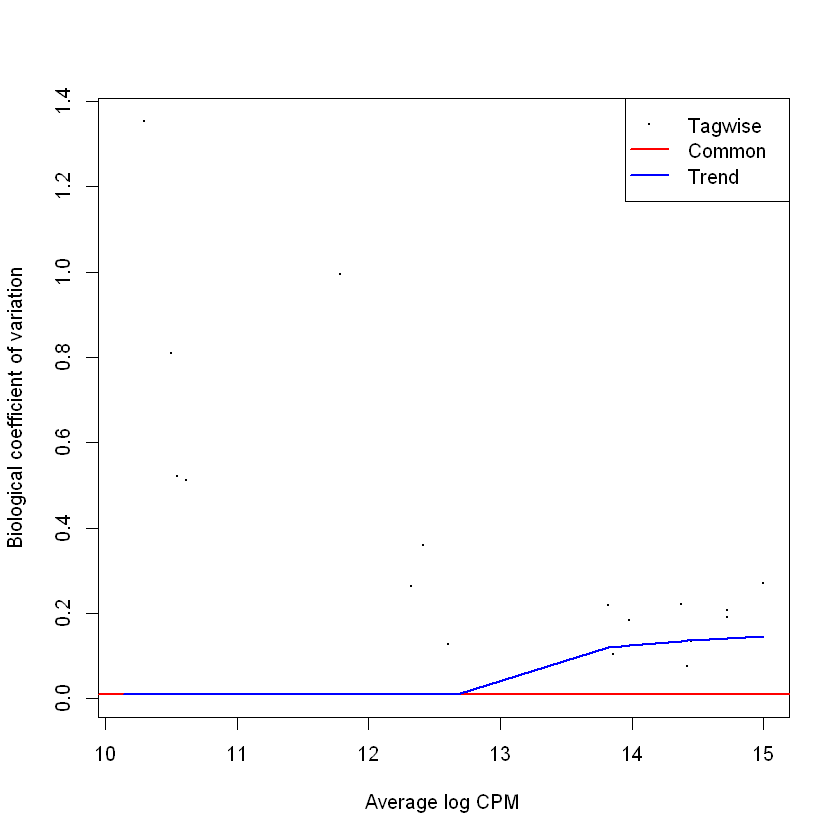

In [128]:
plotBCV(de_exp_table)

### GLM estimates of dispersion

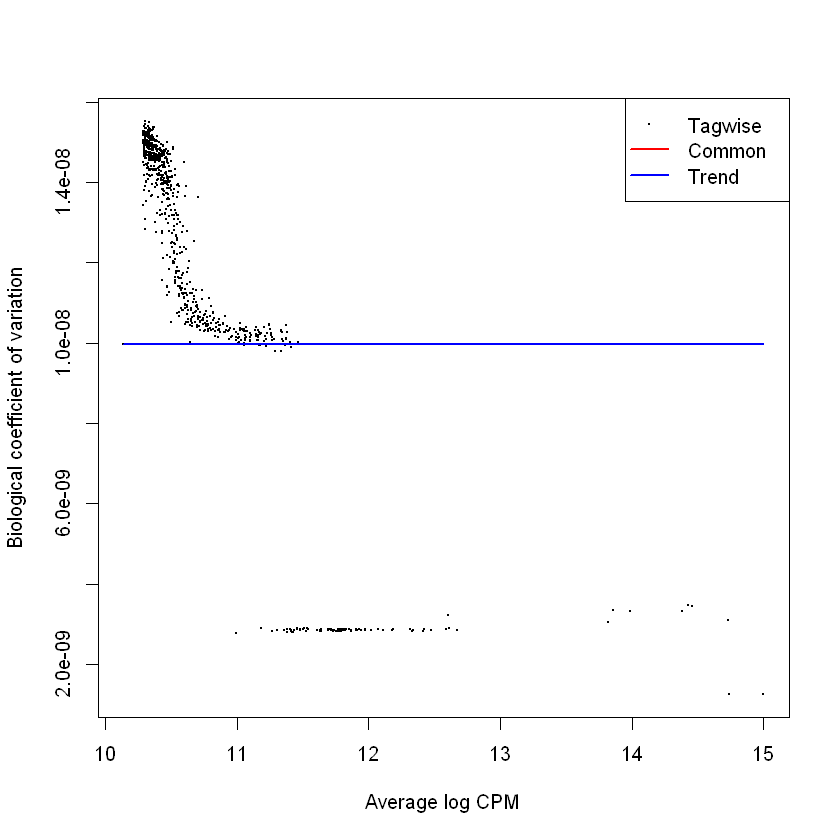

In [129]:
design.mat <- model.matrix(~ 0 + de_exp_table$samples$group)
colnames(design.mat) <- levels(de_exp_table$samples$group)
de_exp_table2 <- estimateGLMCommonDisp(de_exp_table,design.mat)
de_exp_table2 <- estimateGLMTrendedDisp(de_exp_table2, design.mat, method="power")
# You can change method to "auto", "bin.spline", "power", "spline", "bin.loess".
# The default is "auto" which chooses "bin.spline" when > 200 tags and "power" otherwise.
de_exp_table2 <- estimateGLMTagwiseDisp(de_exp_table2,design.mat)
plotBCV(de_exp_table2)

### DE test

In [130]:
et <- exactTest(de_exp_table)

In [131]:
topTags(et, n=20)

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
TUBA1A,3.1959557,12.60685,1.005011e-16,2.780866e-13
MT-CO1,-1.2505480,14.72507,8.589330e-10,1.188334e-06
STMN2,2.7193723,11.82528,4.768196e-09,4.397866e-06
MT-ND2,-1.2816298,13.98019,9.300587e-09,6.433681e-06
RPL37A,1.7426490,12.42150,1.226547e-07,6.787708e-05
MT-CO2,-1.0727249,14.72240,3.770646e-07,1.738896e-04
SCGB2A2,-5.2349141,11.05143,5.828055e-07,2.303747e-04
TUBB2B,3.0268394,11.42565,8.668116e-07,2.998084e-04
YBX1,3.5948504,11.26964,1.602527e-06,4.926881e-04


In [132]:
de <- decideTestsDGE(et, adjust.method="BH", p.value=0.05)
summary(de)

       human-spatial_libd_human
Down                         14
NotSig                     2728
Up                           25

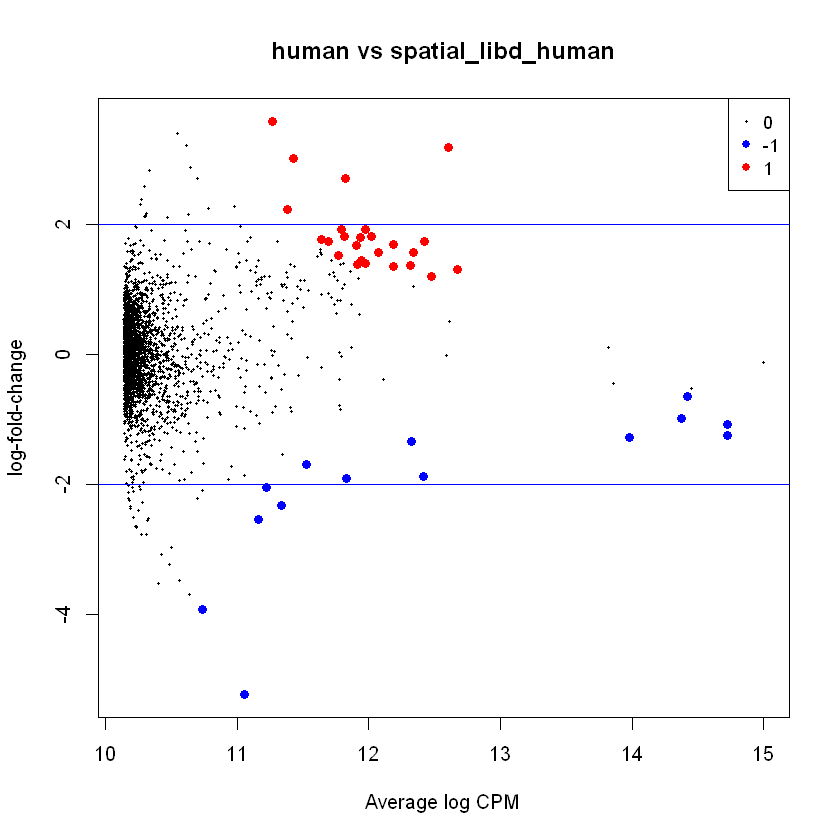

In [133]:
plotMD(et, values = c(-1, 1), hl.col=c("blue","red"))
abline(h = c(-2, 2), col = "blue")

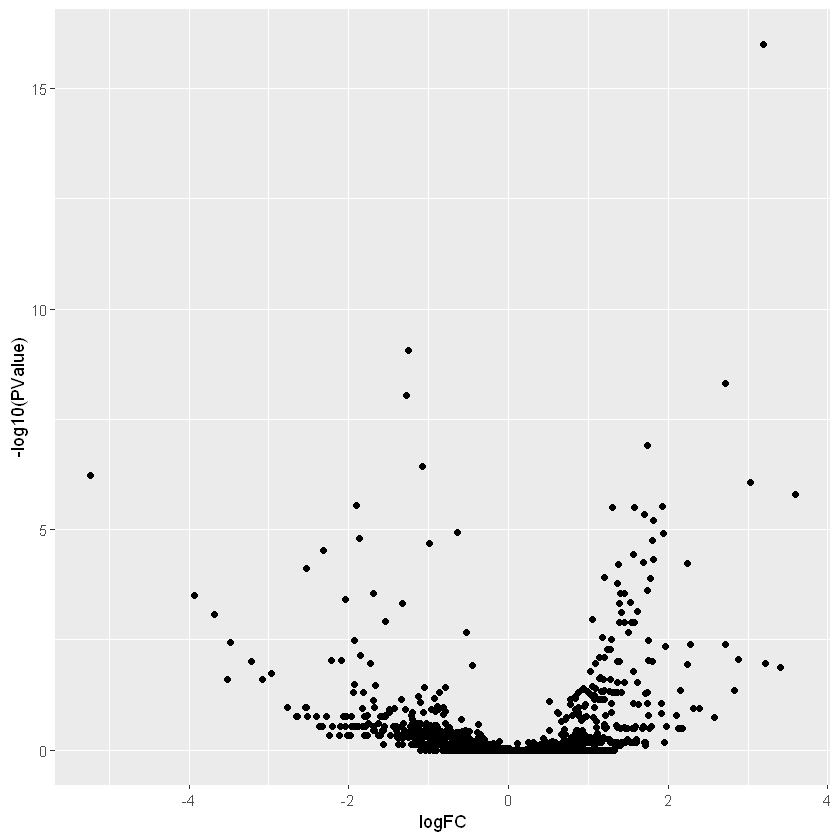

In [135]:
ggplot(et$table, aes(x=logFC,y=-log10(PValue)))+
  geom_point()